# Solving a spiral classification problem- Shallow neural network with Keras

Author: Davor Jordačević

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_s_curve
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

Using TensorFlow backend.


# 1. Create an artificial dataset

### 1.1 Fix random seed for reproducibility

In [0]:
seed = 7
np.random.seed(seed)

### 1.2 We need to generate two sets of data

In [0]:
def spirals(points, noise=.5):
    n = np.sqrt(np.random.rand(points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(points),np.ones(points))))
  
  
X, y = spirals(1000)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(2000, 2)
(2000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 1.3 Spliting data into train and test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 1.4 Data visualization

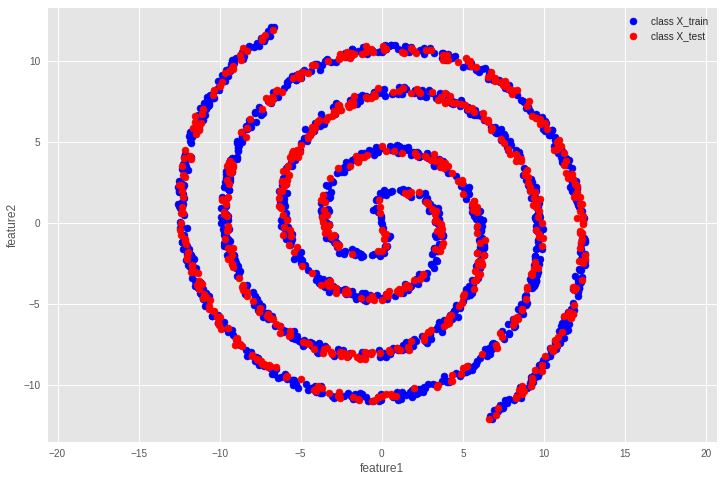

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

### 1.5 Checking the shape of the input data

In [0]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(1340, 2)
y_train:	(1340,)
x_test:		(660, 2)
y_test:		(660,)


# 2. Implementing a Neural Network

### 2.1 Hyperparameters

In [0]:
# Hyperparameters
training_epochs = 1000 # Total number of training epochs
learning_rate = 0.01 # The learning rate

### 2.2 Creating a model

In [0]:
# create a model
def create_model():
  model = Sequential()
  # Input layer
  model.add(Dense(14, input_dim=2, kernel_initializer='normal', activation='relu'))
  model.add(Dense(8,activation='relu'))
  # Output layer
  model.add(Dense(1, activation='sigmoid'))
 
  # Compile a model
  model.compile(loss='binary_crossentropy', optimizer=adam(learning_rate), metrics=['accuracy'])
  return model
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 14)                42        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


### 2.3 Train the model

Let's trains the model for a given number of epochs.

In [0]:
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 batch_size = 512,
 validation_data = (X_test, y_test.T),
 verbose = 0
)

### 2.4 Test the model

The model can generate output predictions for the input samples.

In [0]:
prediction_values = model.predict_classes(X_test)
print("Prediction values shape:", prediction_values.shape)

Prediction values shape: (660, 1)


### 2.5 Accuracy

In [0]:
print(np.mean(results.history["val_acc"]))

0.9653560606237613


### 2.6 Evaluate the model to see the accuracy

Now we can check the accuracy of our model

In [0]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
1340/1340 [==============================] - 0s 21us/step
loss=0.0005, accuracy: 100.0000%
Evaluating on testing set...
660/660 [==============================] - 0s 23us/step
loss=0.0001, accuracy: 100.0000%


### 2.7 Summarize history for accuracy

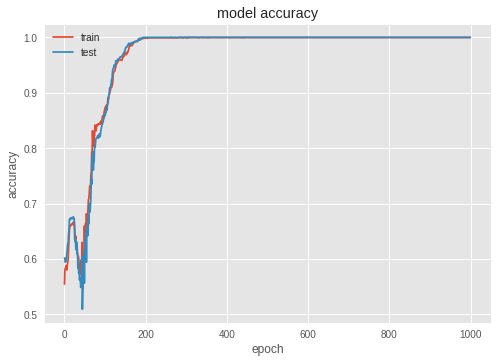

In [0]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

### 2.8 Summarize history for loss

Maximum Loss : 0.6738

Minimum Loss : 0.0005

Loss difference : 0.6733


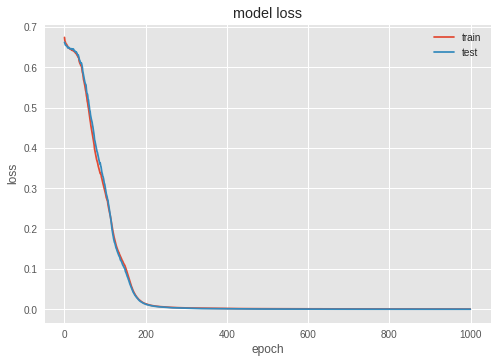

In [0]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# 3. Visualization

### 3.1 Visualization of the model predictions on our training set

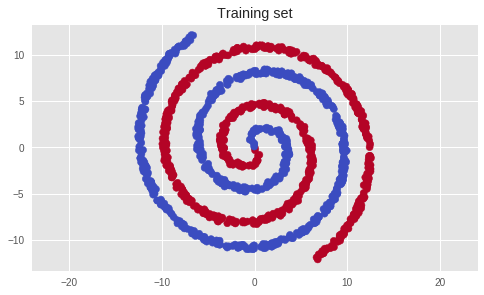

In [0]:
plt.figure(figsize=(8,10))
plt.subplot(211)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

### 3.2 Visualization of the model predictions on our test set

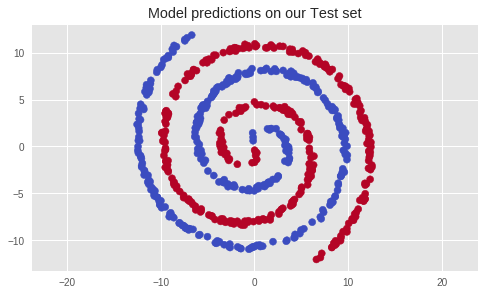

In [0]:
plt.figure(figsize =(8,10))
plt.subplot(212)
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

### 3.3 We can now see how our model separates the classes.

Text(0.5, 1.0, 'Model predictions on our Test set')

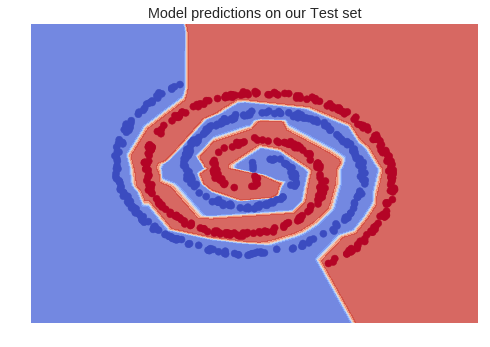

In [0]:
xx = np.linspace(-20, 20, 400)
yy = np.linspace(-20, 20, 400)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-20, 20])
axes.set_ylim([-20, 20])
plt.grid('off')
plt.axis('off')

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')

### 3.4 Display the weights and biases of our model

In [0]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("First hidden layer weights",weights0.shape,":\n",weights0)
print("First hidden layer biases",biases0.shape,":\n",biases0)

# Hidden layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nSecond hidden layer weights",weights1.shape,":\n",weights1)
print("Second hidden layer biases",biases1.shape,":\n",biases1)

# Output layer
weights2 = model.layers[2].get_weights()[0]
biases2 = model.layers[2].get_weights()[1]
print("\nOutput layer weights",weights2.shape,":\n",weights2)
print("Output layer biases",biases2.shape,":\n",biases2)

First hidden layer weights (2, 14) :
 [[ 0.41870704  0.1655306   0.35927093  0.19504614  0.30801076 -0.20699295
  -0.33512995  0.00932766  0.30294135 -0.21211594  0.59581876  0.8715354
  -0.59926975 -0.31368893]
 [-0.1922599   0.18240361  0.20227672 -0.3296126  -0.49604928  0.06875452
  -0.8505791   1.0435914   0.3340583   1.0822754   0.7187829   0.29050082
   0.01416162  0.3689714 ]]
First hidden layer biases (14,) :
 [-2.3179414  -1.1044477  -1.641341    3.7978919  -1.3952283  -1.7810563
 -1.7273948  -0.6417888  -1.8517344   0.50655305  1.4328722  -1.4919453
 -2.2534611  -1.7408919 ]

Second hidden layer weights (14, 8) :
 [[-1.4217801   0.9770523  -0.39415148 -0.06449075 -0.8840493  -1.3770515
   1.5189177   1.4888468 ]
 [ 0.6731697  -0.47858855 -0.4356029   0.27058023  0.7377163   0.08254964
   0.96682787  0.06516697]
 [ 1.3902047   0.57631403 -1.6651103  -0.7402635   0.798682    0.12783287
   1.3846854   1.3092153 ]
 [-0.2148351  -1.6274818  -2.5132594   1.3882821   1.6147565  -0.

### 3.5 Plot the weights and biases of our model

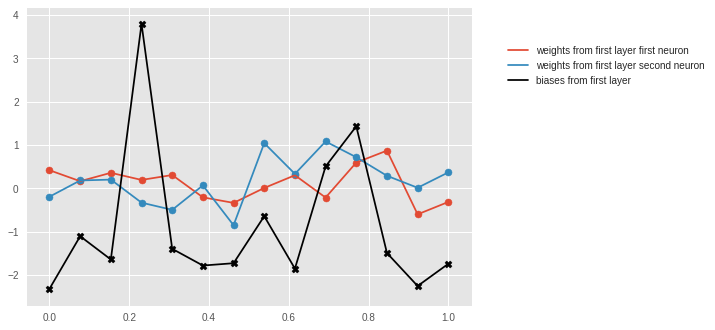

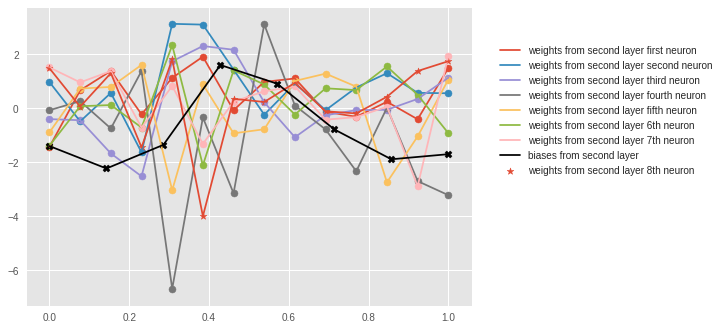

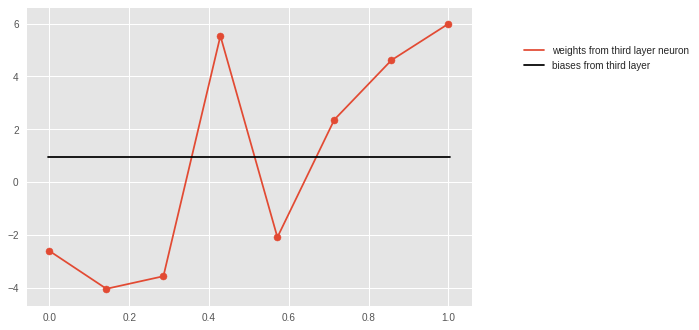

In [0]:
from matplotlib import pylab
from matplotlib.font_manager import FontProperties

y = np.linspace(0,1,14)
plt.plot(y,weights0[0,:],label='weights from first layer first neuron')
plt.plot(y,weights0[1,:],label='weights from first layer second neuron')
plt.plot(y,biases0,label='biases from first layer',color='k')
plt.scatter(y,weights0[0,:])
plt.scatter(y,weights0[1,:])
plt.scatter(y,biases0,marker='X',color='k')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.9))

plt.figure()
y = np.linspace(0,1,14)
plt.plot(y,weights1[:,0],label='weights from second layer first neuron')
plt.plot(y,weights1[:,1],label='weights from second layer second neuron')
plt.plot(y,weights1[:,2],label='weights from second layer third neuron')
plt.plot(y,weights1[:,3],label='weights from second layer fourth neuron')
plt.plot(y,weights1[:,4],label='weights from second layer fifth neuron')
plt.plot(y,weights1[:,5],label='weights from second layer 6th neuron')
plt.plot(y,weights1[:,6],label='weights from second layer 7th neuron')
plt.plot(y,weights1[:,7])

plt.scatter(y,weights1[:,0])
plt.scatter(y,weights1[:,1])
plt.scatter(y,weights1[:,2])
plt.scatter(y,weights1[:,3])
plt.scatter(y,weights1[:,4])
plt.scatter(y,weights1[:,5])
plt.scatter(y,weights1[:,6])
plt.scatter(y,weights1[:,7],marker='*',label='weights from second layer 8th neuron')
y = np.linspace(0,1,8)
plt.plot(y,biases1,label='biases from second layer',color='k')
plt.scatter(y,biases1,marker='X',color='k')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.9))

plt.figure()
y = np.linspace(0,1,8)
plt.plot(y,weights2[:,0],label='weights from third layer neuron')
plt.scatter(y,weights2[:,0])
plt.axhline(y=biases2,xmin=0.05,xmax=0.95,label='bias from third layer',color='k')
pylab.legend(loc=9, bbox_to_anchor=(1.3, 0.9))

# 4. Save a model as picture and pdf

### 4.1 Import required libraries

In [0]:
#!pip install ann_visualizer
#!apt-get install xdg-utils
from keras.utils import plot_model
from IPython.display import clear_output
from ann_visualizer.visualize import ann_viz;
clear_output()

### 4.2 Save a model as png picture

In [0]:
plot_model(model,show_shapes=True,show_layer_names=False, to_file='model.png')

### 4.3 Same a model as pdf

In [0]:
ann_viz(model, title="Solving a spiral classification problem- Shallow neural network with Keras")



---



---

For more informations, visit http://datahacker.rs/ .


---



---

